In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
two_blobs = pd.read_csv('C:\\Users\\MansiJadhav\\Python-for-Machine-Learning-&-Data-Science-Masterclass\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\cluster_two_blobs.csv')

In [9]:
two_blobs_outliers = pd.read_csv('C:\\Users\\MansiJadhav\\Python-for-Machine-Learning-&-Data-Science-Masterclass\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\cluster_two_blobs_outliers.csv')

In [10]:
two_blobs.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


In [11]:
two_blobs_outliers.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


<AxesSubplot:xlabel='X1', ylabel='X2'>

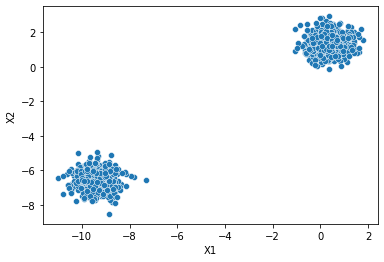

In [12]:
sns.scatterplot(data=two_blobs, x='X1', y='X2')

<AxesSubplot:xlabel='X1', ylabel='X2'>

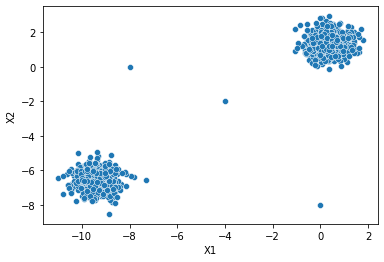

In [13]:
sns.scatterplot(data=two_blobs_outliers, x='X1', y='X2')

In [14]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set1')

In [15]:
from sklearn.cluster import DBSCAN

In [16]:
model = DBSCAN()    # Default values - eps=0.5, min_samples=5

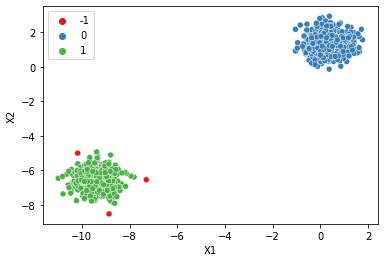

In [17]:
display_categories(model, two_blobs)    # 3 outliers

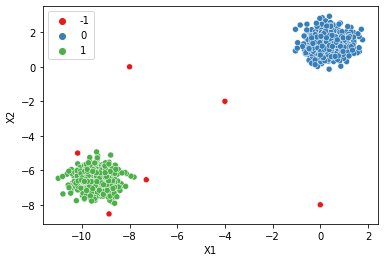

In [19]:
display_categories(model, two_blobs_outliers)    # 6 outliers

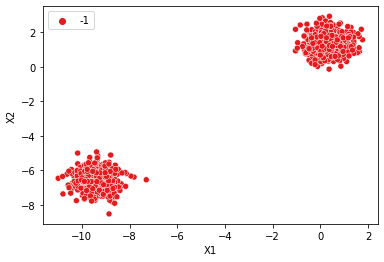

In [20]:
model = DBSCAN(eps=0.01)
display_categories(model, two_blobs)    # Everything becomes an outlier as we decrease eps

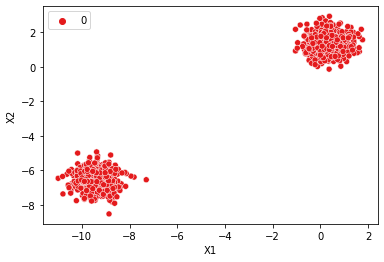

In [21]:
model = DBSCAN(eps=10)
display_categories(model, two_blobs)    # Everything becomes one cluster

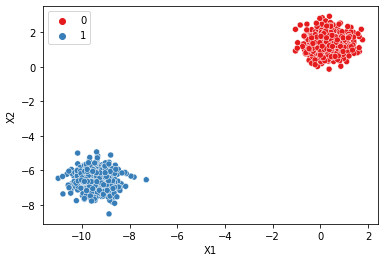

In [22]:
model = DBSCAN(eps=1)
display_categories(model, two_blobs)      # This is a value in between - gives us correct results

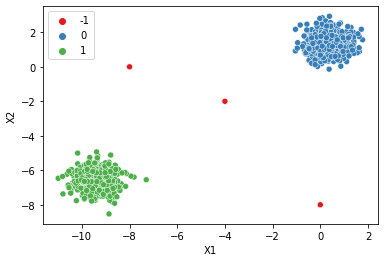

In [24]:
model = DBSCAN(eps=1)
display_categories(model, two_blobs_outliers)    # 3 outliers

In [25]:
np.sum(model.labels_ == -1)    # sum of outliers

3

In [26]:
100 * (np.sum(model.labels_ == -1) / len(model.labels_))    # Percentage outliers

0.29910269192422734

In [28]:
len(np.unique(model.labels_))   # Total number of clusters

3

In [29]:
number_of_outliers = []
outlier_percent = []

for eps in np.linspace(0.001,10,100):
    model = DBSCAN(eps=eps)
    model.fit(two_blobs_outliers)
    
    total = np.sum(model.labels_ == -1)
    
    perc = 100 * (np.sum(model.labels_ == -1) / len(model.labels_))
    
    number_of_outliers.append(total)
    outlier_percent.append(perc)

<AxesSubplot:>

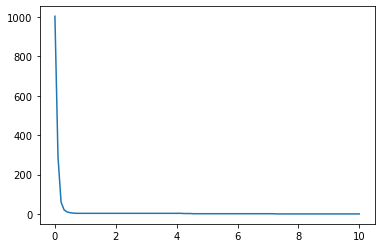

In [30]:
sns.lineplot(x=np.linspace(0.001,10,100), y=number_of_outliers)

(0.0, 2.0)

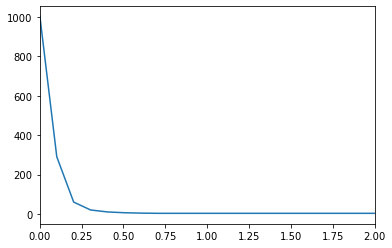

In [31]:
sns.lineplot(x=np.linspace(0.001,10,100), y=number_of_outliers)
plt.xlim(0,2)

In [34]:
number_of_outliers = []
outlier_percent = []

for eps in np.linspace(0.001,7,200):
    model = DBSCAN(eps=eps)
    model.fit(two_blobs_outliers)
    
    total = np.sum(model.labels_ == -1)
    
    perc = 100 * (np.sum(model.labels_ == -1) / len(model.labels_))
    
    number_of_outliers.append(total)
    outlier_percent.append(perc)

Text(0, 0.5, 'Number of outliers')

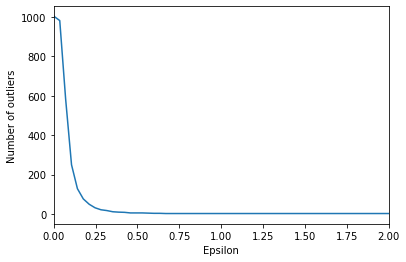

In [36]:
sns.lineplot(x=np.linspace(0.001,7,200), y=number_of_outliers)
plt.xlim(0,2)
plt.xlabel('Epsilon')
plt.ylabel('Number of outliers')

Text(0, 0.5, 'Percentage of outliers')

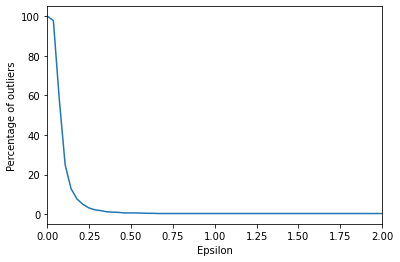

In [37]:
sns.lineplot(x=np.linspace(0.001,7,200), y=outlier_percent)
plt.xlim(0,2)
plt.xlabel('Epsilon')
plt.ylabel('Percentage of outliers')

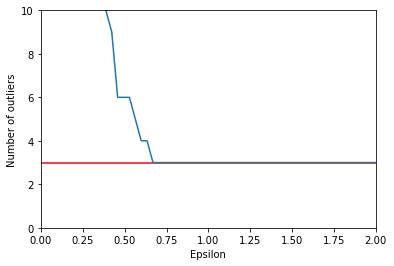

In [39]:
sns.lineplot(x=np.linspace(0.001,7,200), y=number_of_outliers)
plt.xlim(0,2)
plt.ylim(0,10)
plt.xlabel('Epsilon')
plt.ylabel('Number of outliers')
plt.hlines(y=3, xmin=0, xmax=2, color='red')    # Somewhere around 0.7, outliers become constant

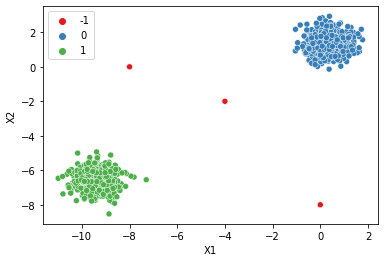

In [40]:
model = DBSCAN(eps=0.75)
display_categories(model, two_blobs_outliers)    # 3 outliers

In [41]:
number_of_outliers = []
outlier_percent = []

for n in np.arange(0,100):
    model = DBSCAN(min_samples=n)
    model.fit(two_blobs_outliers)
    
    total = np.sum(model.labels_ == -1)
    
    perc = 100 * (np.sum(model.labels_ == -1) / len(model.labels_))
    
    number_of_outliers.append(total)
    outlier_percent.append(perc)

Text(0, 0.5, 'Number of outliers')

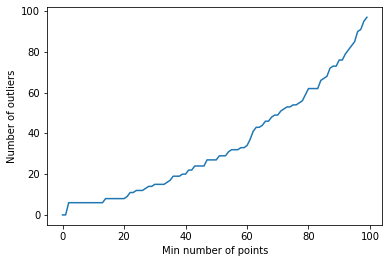

In [45]:
sns.lineplot(x=np.arange(0,100), y=number_of_outliers)
plt.xlabel('Min number of points')
plt.ylabel('Number of outliers')

Text(0, 0.5, 'Percentage outliers')

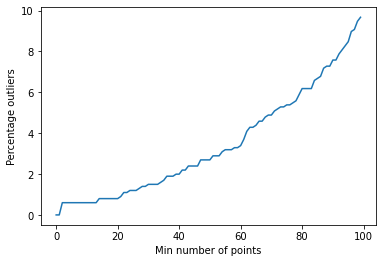

In [46]:
sns.lineplot(x=np.arange(0,100), y=outlier_percent)
plt.xlabel('Min number of points')
plt.ylabel('Percentage outliers')

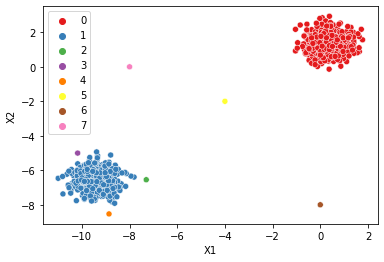

In [47]:
model = DBSCAN(min_samples=1)
display_categories(model, two_blobs_outliers)    # Classifies those 6 outliers as separate clusters - No outliers

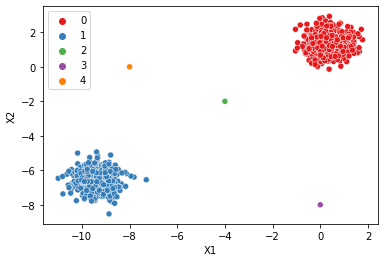

In [48]:
model = DBSCAN(min_samples=1, eps=0.75)
display_categories(model, two_blobs_outliers)    # Only 3 separate points - but still clusters

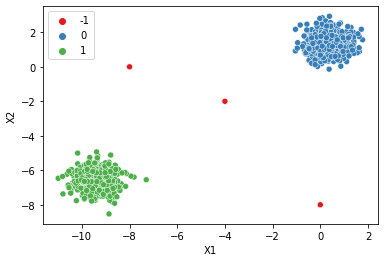

In [49]:
model = DBSCAN(min_samples=3, eps=0.75)
display_categories(model, two_blobs_outliers)   # Correctly classifies into 2 clusters and 3 outliers

In [50]:
# A good starting point for min number of samples is 2*(number of dimensions)
# Here dimensions=2, so 4 is a good starting point